In [38]:
from typing_extensions import TypedDict
from typing import Literal

from dataclasses import dataclass

@dataclass
class DataclassState:
    name: str
    mood: Literal['happy', 'sad']

In [39]:
def node_1(state):
    return {"name":state.name + " is "}

def mood_happy(state):
    return {"mood": "happy"}

def mood_sad(state):
    return {"mood": "sad"}

In [40]:
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

def decide_mood(state) -> Literal["node_happy", "node_sad"]:
    if random.random() < 0.5:
        return "node_happy"
    return "node_sad"

In [42]:
builder = StateGraph(DataclassState)
builder.add_node("node_1", node_1)
builder.add_node("node_happy", mood_happy)
builder.add_node("node_sad", mood_sad)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_happy", END)
builder.add_edge("node_sad", END)

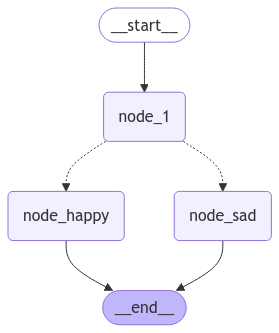

In [43]:
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))